## Exploratory data analysis, visualisasi, & machine learning mileapp json file 

In [3]:
### library
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from geopy.geocoders import Nominatim
from geopy.point import Point
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import openpyxl
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

###  sebelum load data kita import dulu library yang dibutuhkan pada cell 1, untuk mendapatkan library apa saja yang kita butuhkan nantinya.

In [13]:
df = pd.read_json('data-sample.json')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   taskLocationDone   7566 non-null   object
 1   taskCreatedTime    8334 non-null   object
 2   cod                2358 non-null   object
 3   taskAssignedTo     8333 non-null   object
 4   taskCompletedTime  7566 non-null   object
 5   taskStatus         8334 non-null   object
 6   flow               8334 non-null   object
 7   taskId             8334 non-null   object
 8   UserVar            8334 non-null   object
dtypes: object(9)
memory usage: 586.1+ KB


In [15]:
df.isnull().sum()

taskLocationDone      768
taskCreatedTime         0
cod                  5976
taskAssignedTo          1
taskCompletedTime     768
taskStatus              0
flow                    0
taskId                  0
UserVar                 0
dtype: int64

##### dari informasi diatas kita mendapatkan informasi yang penting dimana semua column masih berbentuk tipe data object, hal ini yang harus kita ubah bentuknya sesuai dengan bentuk tipe data yang diperlukan, sebagai contoh jika data tersebut harusnya time/datetime maka kita convert data tersebut kedalam data tipe varian datetime

#### convert to datetime, remove the +0700

##### normalize time to gmt

In [16]:
df['taskCreatedTime'] = pd.to_datetime(df['taskCreatedTime'], utc= True)
df['taskCreatedTime'] = df['taskCreatedTime'].dt.tz_localize(None)
df['taskCompletedTime'] = pd.to_datetime(df['taskCompletedTime'], utc=True)
df['taskCompletedTime'] = df['taskCompletedTime'].dt.tz_localize(None)

In [17]:
df

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 13:17:26,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 13:46:30,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 01:41:07,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 05:33:48,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 01:41:07,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 06:41:57,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 01:41:07,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 11:18:19,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 01:41:07,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 03:51:49,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
...,...,...,...,...,...,...,...,...,...
8329,"{'lon': 0, 'lat': 0}",2022-11-10 02:07:12,NaN,debonairPonie1,2022-11-10 02:38:04,done,Delivery,501af4e040a742e9e878,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 02:21:42,NaN,murkyThrushe3,2022-11-10 02:37:52,done,Delivery,5cc952d9e9f8066dbf24,"{'branch_dest': 'JOG', 'taskStatusLabel': 'Fai..."
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 02:36:44,NaN,enragedCake7,2022-11-10 02:37:55,done,Delivery,1b136b5a3c60749eb571,"{'branch_dest': 'TKG', 'taskStatusLabel': 'Suc..."
8332,"{'lon': 119.8771726, 'lat': -8.5133055}",2022-11-10 00:25:40,"{'amount': 151000, 'received': False}",lyingPaella2,2022-11-10 02:37:53,done,Delivery,e92e813c8539080c922e,"{'branch_dest': 'KOE', 'taskStatusLabel': 'Fai..."


#### eda with drop value or fill the missing value

In [18]:
## emulates fillna with ffill or we can use it dropna
## we can fill the NaN value with dropna and ffill or bfill by interpolate it, for now we can emulate it with 2 ways, with dropna and ffill
df_dropna = df.copy()
df_dropna.dropna(inplace=True)
df_dropna#.taskId.nunique()

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 13:17:26,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 13:46:30,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 01:41:07,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 05:33:48,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 01:41:07,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 06:41:57,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 01:41:07,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 11:18:19,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 01:41:07,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 03:51:49,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
...,...,...,...,...,...,...,...,...,...
8286,"{'lon': 0, 'lat': 0}",2022-11-10 02:19:14,"{'amount': 319000, 'received': False}",brainyBasmati9,2022-11-10 02:38:08,done,Delivery,696decc0bf5990af6b38,"{'branch_dest': 'BOO', 'taskStatusLabel': 'Fai..."
8299,"{'lon': 114.5721119, 'lat': -0.6143576}",2022-11-10 02:07:18,"{'amount': 155000, 'received': False}",guiltyEggs0,2022-11-10 02:38:34,done,Delivery,92ec2704c98ef43b9364,"{'branch_dest': 'BDJ', 'taskStatusLabel': 'Fai..."
8303,"{'lon': 104.2333475, 'lat': 1.0699627}",2022-11-10 02:27:58,"{'amount': 158000, 'received': False}",similarDunbird5,2022-11-10 02:38:33,done,Delivery,c57cf6a756c579652ea0,"{'branch_dest': 'TNJ', 'taskStatusLabel': 'Fai..."
8309,"{'lon': 106.8599712, 'lat': -6.6770378}",2022-11-10 02:36:24,"{'amount': 80499, 'received': False}",amusedMagpie2,2022-11-10 02:37:58,done,Delivery,df65494d42a5bfacd3e7,"{'branch_dest': 'BOO', 'taskStatusLabel': 'Fai..."


from dropna we can see the value with drop na has been dropped and it not fit in the column information like this
so we try with ffill, and the markdown bellow we can see all nan value will be filled, but we didnt need to ffill too, since tasklocation done and uservar had relation one to another

In [19]:
df_ffill = df.copy()
df_ffill.ffill(inplace=True)
df_ffill#.isnull().sum()

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 13:17:26,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 13:46:30,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 01:41:07,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 05:33:48,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 01:41:07,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 06:41:57,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 01:41:07,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 11:18:19,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 01:41:07,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 03:51:49,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
...,...,...,...,...,...,...,...,...,...
8329,"{'lon': 0, 'lat': 0}",2022-11-10 02:07:12,"{'amount': 80499, 'received': False}",debonairPonie1,2022-11-10 02:38:04,done,Delivery,501af4e040a742e9e878,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 02:21:42,"{'amount': 80499, 'received': False}",murkyThrushe3,2022-11-10 02:37:52,done,Delivery,5cc952d9e9f8066dbf24,"{'branch_dest': 'JOG', 'taskStatusLabel': 'Fai..."
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 02:36:44,"{'amount': 80499, 'received': False}",enragedCake7,2022-11-10 02:37:55,done,Delivery,1b136b5a3c60749eb571,"{'branch_dest': 'TKG', 'taskStatusLabel': 'Suc..."
8332,"{'lon': 119.8771726, 'lat': -8.5133055}",2022-11-10 00:25:40,"{'amount': 151000, 'received': False}",lyingPaella2,2022-11-10 02:37:53,done,Delivery,e92e813c8539080c922e,"{'branch_dest': 'KOE', 'taskStatusLabel': 'Fai..."


In [20]:
# showed 5976 rows/value not nan due to not cod
df[df['cod'].isna()]
#visualize it with value columns not cod (later)

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
73,"{'lon': 98.8149147, 'lat': 1.7139167}",2022-11-01 02:31:32,NaN,enragedLlama3,2022-11-01 06:14:31,done,Delivery,b7f9f3f96def6b866166,"{'branch_dest': 'DTB', 'taskStatusLabel': 'Suc..."
550,NaN,2022-11-01 08:04:06,NaN,mildCardinal0,NaT,done,Delivery,9779ae5b5f88ba0bf31c,"{'branch_dest': 'BKI', 'taskStatusLabel': 'Suc..."
551,NaN,2022-11-01 09:59:58,NaN,mildCardinal0,NaT,done,Delivery,8ade827b1e3530c02e82,"{'branch_dest': 'BKI', 'taskStatusLabel': 'Suc..."
552,NaN,2022-11-01 09:59:58,NaN,mildCardinal0,NaT,done,Delivery,292b1e9f73099dac1209,"{'branch_dest': 'BKI', 'taskStatusLabel': 'Suc..."
553,NaN,2022-11-01 09:59:58,NaN,mildCardinal0,NaT,done,Delivery,7e8862b3f4010465f006,"{'branch_dest': 'BKI', 'taskStatusLabel': 'Suc..."
...,...,...,...,...,...,...,...,...,...
8328,"{'lon': 0, 'lat': 0}",2022-11-10 00:46:14,NaN,emptyPretzels3,2022-11-10 02:37:50,done,Delivery,469a6678ea253784e7e3,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
8329,"{'lon': 0, 'lat': 0}",2022-11-10 02:07:12,NaN,debonairPonie1,2022-11-10 02:38:04,done,Delivery,501af4e040a742e9e878,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 02:21:42,NaN,murkyThrushe3,2022-11-10 02:37:52,done,Delivery,5cc952d9e9f8066dbf24,"{'branch_dest': 'JOG', 'taskStatusLabel': 'Fai..."
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 02:36:44,NaN,enragedCake7,2022-11-10 02:37:55,done,Delivery,1b136b5a3c60749eb571,"{'branch_dest': 'TKG', 'taskStatusLabel': 'Suc..."


In [21]:
number_duplicated = df['taskId'].duplicated().sum()
number_unique_task = df['taskId'].nunique()

In [22]:
# check how many task id number unique
# df['taskId'].nunique()
print('number duplicated:', number_duplicated)
print("number unique task:", number_unique_task)
# this will show to us if taskid number is unique, and not duplicated

number duplicated: 0
number unique task: 8334


### apply longitude and latitude to geography value 

In [23]:
# check sample longitude and latitude with nan values from task assigned
df.query("taskAssignedTo == 'emptyPretzels3'")

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
6323,"{'lon': 0, 'lat': 0}",2022-11-08 00:33:07,NaN,emptyPretzels3,2022-11-08 02:14:27,done,Delivery,f3d893bf5621caac50b0,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
6426,"{'lon': 0, 'lat': 0}",2022-11-09 00:31:32,NaN,emptyPretzels3,2022-11-09 02:13:43,done,Delivery,30d144817082d9016d09,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
6831,"{'lon': 0, 'lat': 0}",2022-11-09 00:31:31,NaN,emptyPretzels3,2022-11-09 02:06:09,done,Delivery,3e555677312bb710fc2d,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
6978,"{'lon': 0, 'lat': 0}",2022-11-09 00:31:31,NaN,emptyPretzels3,2022-11-09 02:18:56,done,Delivery,e688ea98f47d08fca8a6,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
7719,"{'lon': 0, 'lat': 0}",2022-11-10 00:46:14,NaN,emptyPretzels3,2022-11-10 02:03:56,done,Delivery,53dcb541dab968e33d99,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
8218,"{'lon': 0, 'lat': 0}",2022-11-10 00:46:13,NaN,emptyPretzels3,2022-11-10 02:37:50,done,Delivery,70ab38bd9a5b5ffa2a42,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
8235,"{'lon': 0, 'lat': 0}",2022-11-10 00:46:14,NaN,emptyPretzels3,2022-11-10 02:37:50,done,Delivery,01992d2fb160969826cd,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
8264,"{'lon': 0, 'lat': 0}",2022-11-10 00:46:13,NaN,emptyPretzels3,2022-11-10 02:37:50,done,Delivery,84d2705088ff7e7c7e98,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
8273,"{'lon': 0, 'lat': 0}",2022-11-10 00:46:13,NaN,emptyPretzels3,2022-11-10 02:37:50,done,Delivery,86c2ed48c5b05478015e,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
8312,"{'lon': 0, 'lat': 0}",2022-11-10 00:46:14,NaN,emptyPretzels3,2022-11-10 02:37:50,done,Delivery,60731ae4c9f801f84683,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."


In [24]:
def extract_location(row):
    try:
        return pd.Series({'longitude': row['lon'], 'latitude': row['lat']})
    except (TypeError, KeyError):
        return pd.Series({'longitude': None, 'latitude': None})

df[['longitude', 'latitude']] = df['taskLocationDone'].apply(lambda x: extract_location(x))

def extract_location(row):
    try:
        return pd.Series({'amount': row['amount'], 'received': row['received']})
    except (TypeError, KeyError):
        return pd.Series({'amount': None, 'received': None})
df[['amount', 'received']] = df['cod'].apply(lambda x: extract_location(x))

df['amount'] = df['amount'].astype('Int64')


In [25]:
# # apply geolocation from longitude and latitude
# geoLoc = Nominatim(user_agent="GetLoc")
# # filter out rows with NaN values in latitude or longitude
# df_filtered = df.dropna(subset=['latitude', 'longitude'])

# # apply the reverse() method to the filtered DataFrame
# df_filtered['location'] = df_filtered.apply(lambda row: geoLoc.reverse(Point(row['latitude'], row['longitude'])), axis=1)

# # merge the results back into the original DataFrame
# df = df.merge(df_filtered[['location']], how='left', left_index=True, right_index=True)

# # got error 502 whhen i want implement location by longitude and latitude

In [27]:
# normalize json information and make new columns
df_normalized = pd.json_normalize(df['UserVar'])
df = pd.concat([df, df_normalized], axis=1)
df['amount'] =df['amount'].replace(pd.NA, np.nan)
df['taskDetailStatusLabel'] = df['taskDetailStatusLabel'].str.lower()

In [28]:
# split new dataframe, the clean one so we got the dataframe that we need to processing the data (visualization and machine learning)
df_clean = df.copy()
df_clean.drop(columns=['taskLocationDone', 'UserVar', 'cod'], inplace = True)

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   taskCreatedTime        8334 non-null   datetime64[ns]
 1   taskAssignedTo         8333 non-null   object        
 2   taskCompletedTime      7566 non-null   datetime64[ns]
 3   taskStatus             8334 non-null   object        
 4   flow                   8334 non-null   object        
 5   taskId                 8334 non-null   object        
 6   longitude              7566 non-null   float64       
 7   latitude               7566 non-null   float64       
 8   amount                 2358 non-null   Int64         
 9   received               2358 non-null   object        
 10  branch_dest            8334 non-null   object        
 11  taskStatusLabel        7572 non-null   object        
 12  receiver_city          8282 non-null   object        
 13  tas

In [40]:
df_clean['task_done'] = (df_clean['taskCompletedTime'] - df_clean['taskCreatedTime']).apply(lambda x: x.total_seconds() / 60 if pd.notnull(x) else np.nan)
df_clean

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,longitude,latitude,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus,task_done
0,2022-11-01 13:17:26,pacifiedLion0,2022-11-01 13:46:30,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000,True,SRG,Success,"BATANG ,KAB BATANG",yang bersangkutan,D01,13,CGK,COLF01,29.066667
1,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 05:33:48,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500,True,MGL,Success,"PURWODADI,PURWOREJO",yang bersangkutan,D01,1.3,CGK,COLF01,232.683333
2,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 06:41:57,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500,True,MGL,Success,"PURWODADI,PURWOREJO",yang bersangkutan,D01,3,CGK,COLF01,300.833333
3,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 11:18:19,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815,True,MGL,Success,"PURWODADI,PURWOREJO",yang bersangkutan,D01,0.625,CGK,COLF01,577.200000
4,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 03:51:49,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562,True,MGL,Success,"BAGELEN,PURWOREJO",yang bersangkutan,D01,3,CGK,COLF01,130.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 02:07:12,debonairPonie1,2022-11-10 02:38:04,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,<NA>,None,CGK,Success,"PALMERAH ,JAKARTA BA",atasan/staff/karyawan/bawahan,D10,1,CGK,COLF01,30.866667
8330,2022-11-10 02:21:42,murkyThrushe3,2022-11-10 02:37:52,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,<NA>,None,JOG,Failed,KOTA BANTUL,alamat tidak lengkap service/ tidak dikenal,U01,1,TGR,COLF02,16.166667
8331,2022-11-10 02:36:44,enragedCake7,2022-11-10 02:37:55,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,<NA>,None,TKG,Success,MARGA SEKAMPUNG KAB.,yang bersangkutan,D01,1.44,CGK,COLF01,1.183333
8332,2022-11-10 00:25:40,lyingPaella2,2022-11-10 02:37:53,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000,False,KOE,Failed,"KOMODO,LABUAN BAJO",penerima pindah alamat,U03,0.6,CGK,COLF02,132.216667


In [38]:
df_clean['task_done'] = pd.to_timedelta(df_clean['task_done'], unit='m')
df_clean

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,longitude,latitude,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus,task_done
0,2022-11-01 13:17:26,pacifiedLion0,2022-11-01 13:46:30,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000,True,SRG,Success,"BATANG ,KAB BATANG",yang bersangkutan,D01,13,CGK,COLF01,0 days 00:29:04.000000020
1,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 05:33:48,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500,True,MGL,Success,"PURWODADI,PURWOREJO",yang bersangkutan,D01,1.3,CGK,COLF01,0 days 03:52:40.999999980
2,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 06:41:57,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500,True,MGL,Success,"PURWODADI,PURWOREJO",yang bersangkutan,D01,3,CGK,COLF01,0 days 05:00:49.999999980
3,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 11:18:19,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815,True,MGL,Success,"PURWODADI,PURWOREJO",yang bersangkutan,D01,0.625,CGK,COLF01,0 days 09:37:12
4,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 03:51:49,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562,True,MGL,Success,"BAGELEN,PURWOREJO",yang bersangkutan,D01,3,CGK,COLF01,0 days 02:10:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 02:07:12,debonairPonie1,2022-11-10 02:38:04,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,<NA>,None,CGK,Success,"PALMERAH ,JAKARTA BA",atasan/staff/karyawan/bawahan,D10,1,CGK,COLF01,0 days 00:30:52.000000020
8330,2022-11-10 02:21:42,murkyThrushe3,2022-11-10 02:37:52,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,<NA>,None,JOG,Failed,KOTA BANTUL,alamat tidak lengkap service/ tidak dikenal,U01,1,TGR,COLF02,0 days 00:16:10.000000020
8331,2022-11-10 02:36:44,enragedCake7,2022-11-10 02:37:55,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,<NA>,None,TKG,Success,MARGA SEKAMPUNG KAB.,yang bersangkutan,D01,1.44,CGK,COLF01,0 days 00:01:10.999999980
8332,2022-11-10 00:25:40,lyingPaella2,2022-11-10 02:37:53,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000,False,KOE,Failed,"KOMODO,LABUAN BAJO",penerima pindah alamat,U03,0.6,CGK,COLF02,0 days 02:12:13.000000020


## visualization

#### rata-rata waktu terselesaikan untuk setiap task

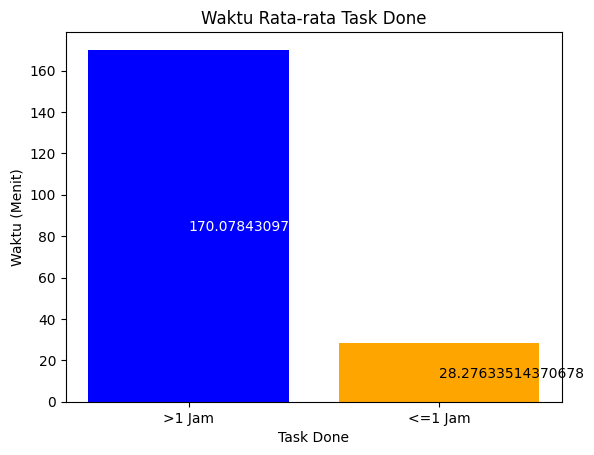

In [32]:
# convert column task done menjadi timedelta
df_clean['task_done'] = pd.to_timedelta(df_clean['task_done'], unit='m')
df_clean

# Mengambil hanya task yang success saja
df_clean_viz1 =df_clean.copy()
df_clean_viz1 = df_clean_viz1[df_clean_viz1['taskStatusLabel'] == 'Success']

# Mengubah task_done ke dalam satuan menit
df_clean_viz1['task_done'] = df_clean_viz1['task_done'].dt.total_seconds() / 60

# Memisahkan task_done yang lebih dari 1 jam dan kurang dari 1 jam
df_over_1_hour = df_clean_viz1[df_clean_viz1['task_done'] > 60]
df_under_1_hour = df_clean_viz1[df_clean_viz1['task_done'] < 60]

# Menghitung waktu rata-rata task_done
mean_over_1_hour = df_over_1_hour['task_done'].mean()
mean_under_1_hour = df_under_1_hour['task_done'].mean()

# Menghitung jumlah task_done dalam masing-masing kategori
count_over_1_hour = df_over_1_hour['task_done'].count()
count_under_1_hour = df_under_1_hour['task_done'].count()

# Membuat visualisasi
fig, ax = plt.subplots()
ax.bar(['>1 Jam', '<=1 Jam'], [mean_over_1_hour, mean_under_1_hour], color=['blue', 'orange'])
ax.set_title('Waktu Rata-rata Task Done')
ax.set_xlabel('Task Done')
ax.set_ylabel('Waktu (Menit)')

# Menambahkan label angka pada tengah bar
ax.text(0, mean_over_1_hour/2, str(mean_over_1_hour), color = 'white', verticalalignment='center_baseline')
ax.text(1, mean_under_1_hour/2, str(mean_under_1_hour), verticalalignment='center_baseline')

plt.savefig('rata-rata_task_done.png')

### banyaknya task yang terselesaikan dalam waktu kurang dari 1 jam vs kurang dari 1 jam (visualisasi)

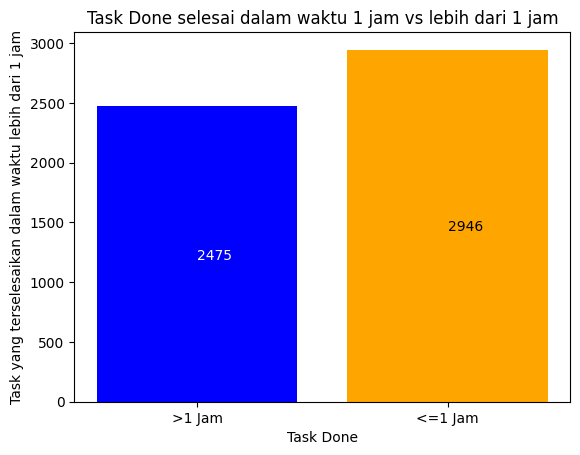

In [35]:
# convert column task done menjadi timedelta
df_clean['task_done'] = pd.to_timedelta(df_clean['task_done'], unit='m')
df_clean

# Mengambil hanya task yang success saja
df_clean_viz1 =df_clean.copy()
df_clean_viz1 = df_clean_viz1[df_clean_viz1['taskStatusLabel'] == 'Success']

# Mengubah task_done ke dalam satuan menit
df_clean_viz1['task_done'] = df_clean_viz1['task_done'].dt.total_seconds() / 60

# Memisahkan task_done yang lebih dari 1 jam dan kurang dari 1 jam
df_over_1_hour = df_clean_viz1[df_clean_viz1['task_done'] > 60]
df_under_1_hour = df_clean_viz1[df_clean_viz1['task_done'] < 60]

# Menghitung waktu rata-rata task_done
mean_over_1_hour = df_over_1_hour['task_done'].mean()
mean_under_1_hour = df_under_1_hour['task_done'].mean()

# Menghitung jumlah task_done dalam masing-masing kategori
count_over_1_hour = df_over_1_hour['task_done'].count()
count_under_1_hour = df_under_1_hour['task_done'].count()

# Membuat visualisasi
fig, ax = plt.subplots()
ax.bar(['>1 Jam', '<=1 Jam'], [count_over_1_hour, count_under_1_hour], color=['blue', 'orange'])
ax.set_title('Task Done selesai dalam waktu 1 jam vs lebih dari 1 jam')
ax.set_xlabel('Task Done')
ax.set_ylabel('Task yang terselesaikan dalam waktu lebih dari 1 jam')

# Menambahkan label angka pada tengah bar
ax.text(0, count_over_1_hour/2, str(count_over_1_hour), color = 'white', verticalalignment='center_baseline')
ax.text(1, count_under_1_hour/2, str(count_under_1_hour), verticalalignment='center_baseline')

plt.savefig('task_done.png')

dengan hasil tersebut pada visualisasi diatas kita bisa mengetahui waktu terselesaikan rata-rata adalah lebih dari 1 jam pada pelayanan yang diberikan, dengan rata-rata waktu task terselesaikan dalam waktu 170 menit, dengan penyelesaian task paling banyak adalah kurang dari kurun waktu 1 jam

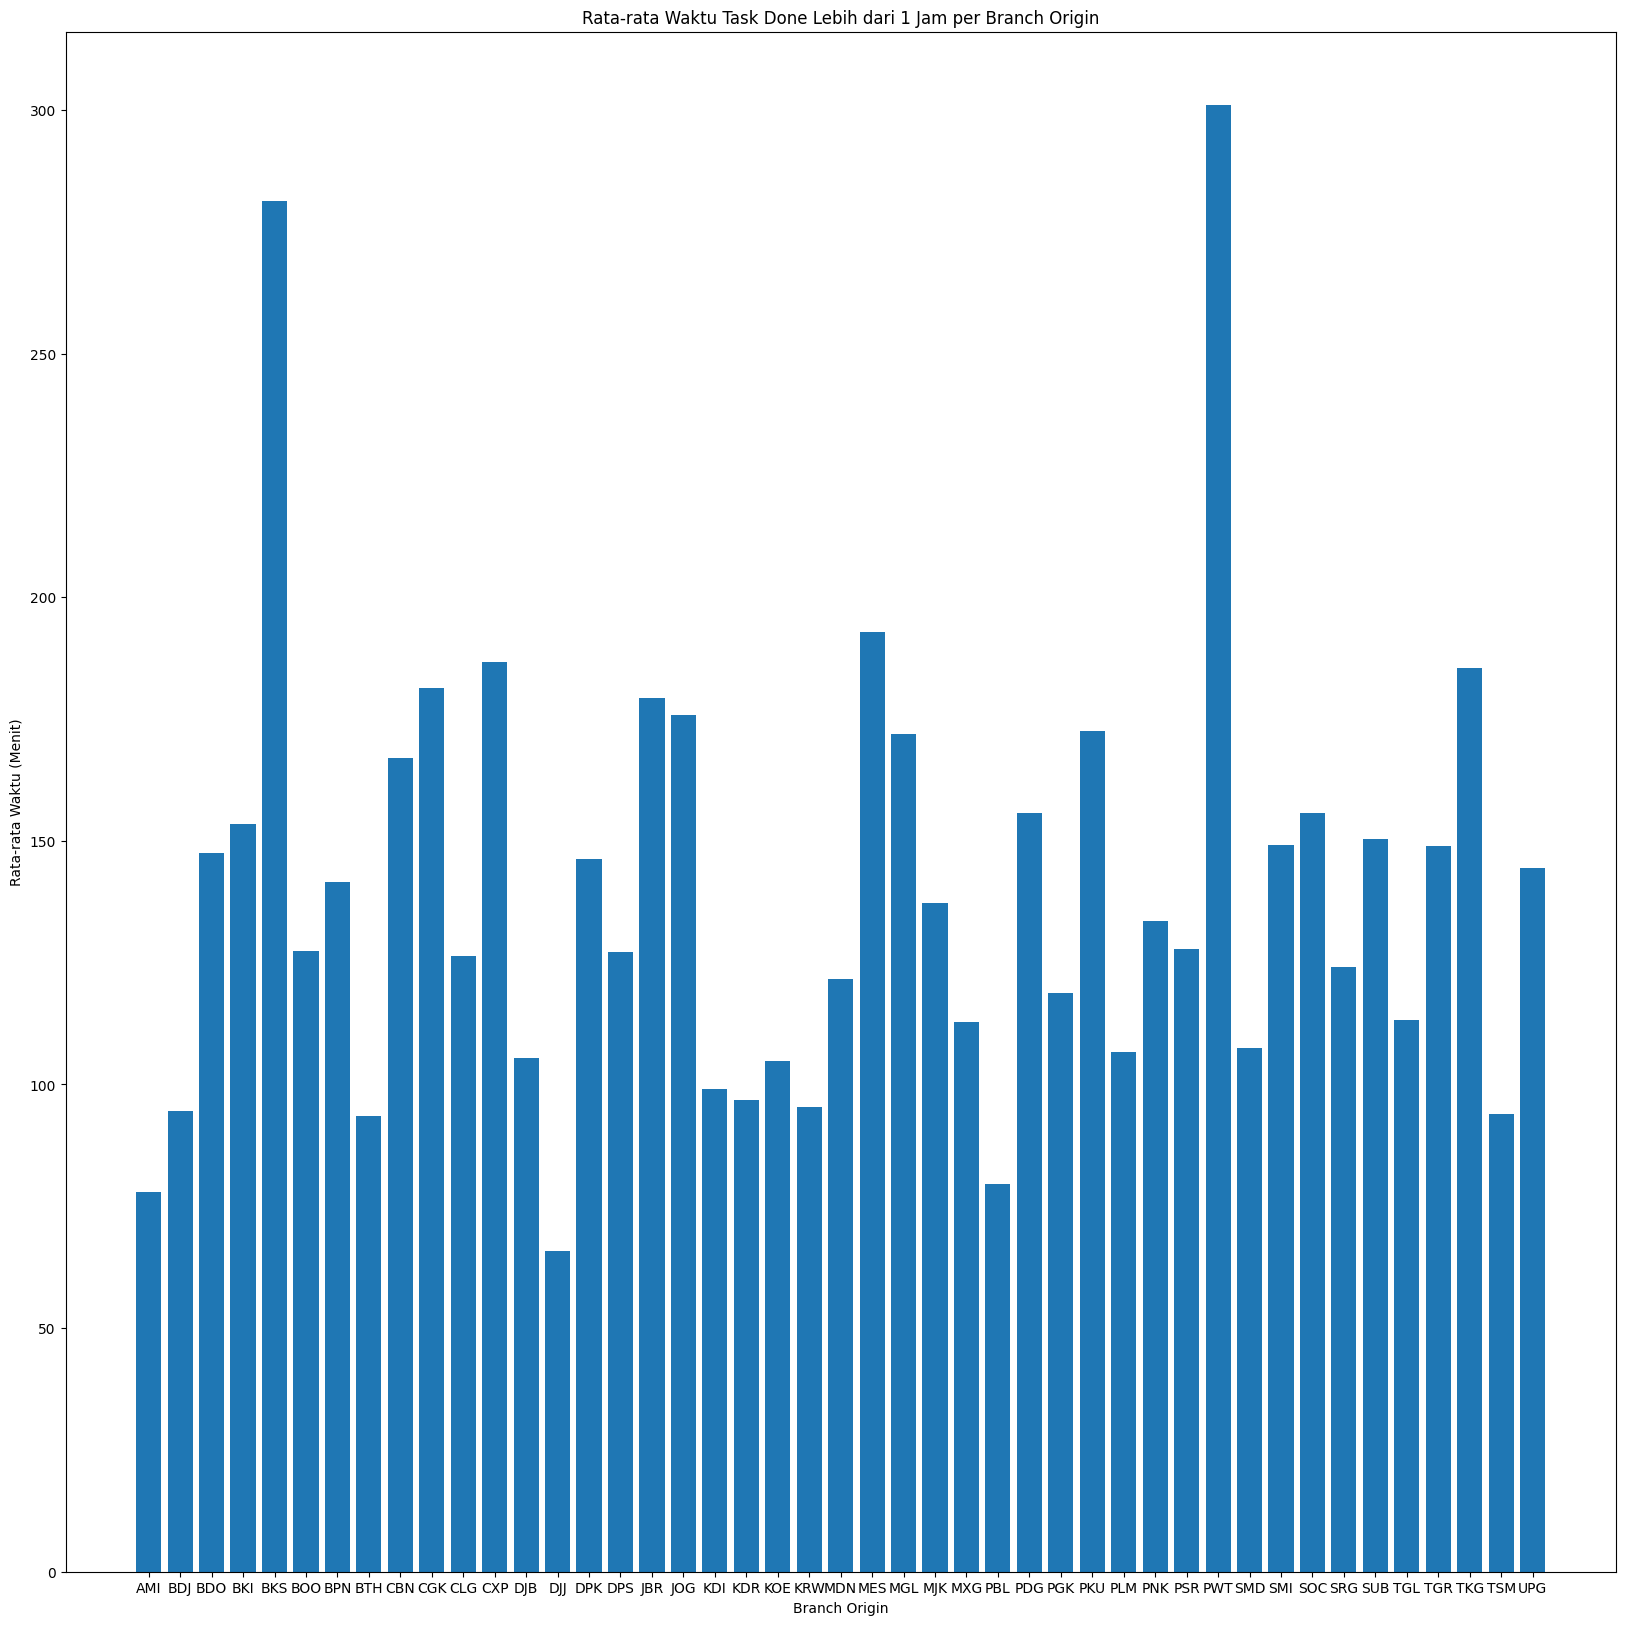

In [41]:
# Memisahkan task_done yang lebih dari 1 jam
df_over_1_hour = df_clean[df_clean['task_done'] >= 60]

# Menghitung rata-rata waktu task_done per branch_origin
mean_by_branch = df_over_1_hour.groupby('branch_origin')['task_done'].mean()

# Membuat visualisasi
fig, ax = plt.subplots(figsize=(20,20))
ax.bar(mean_by_branch.index, mean_by_branch.values)
ax.set_title('Rata-rata Waktu Task Done Lebih dari 1 Jam per Branch Origin')
ax.set_xlabel('Branch Origin')
ax.set_ylabel('Rata-rata Waktu (Menit)')
plt.savefig('branch.png')

berdasarkan visualisasi diatas 2 branch yang memiliki waktu task yang lebih lama untuk diselesaikan (lebih dari 1 jam), adalah PWT dan BKS, kedepannya kita sebagai yang memberikan service dapat mengintruksikan untuk mengirim lebih banyak orang pada kedua branch tersebut, karena kedua branch tersebut adalah yang memiliki waktu pelayanan terlama, hal ini nantinya dapat mengakibatkan keterlambatan paket yang diterima oleh customer

In [42]:
# visualisasi branch origin terbanyak/pelayanan pada branch origin terbanyak yang mengambil dari column branch origin, dengan visualisasi menggunakan bubble chart
branch_count = df_clean['branch_origin'].value_counts()
branch_df = pd.DataFrame({'branch_origin': branch_count.index, 'count': branch_count.values})
branch_df['size'] = branch_df['count'] * 0.2

In [43]:
branch_df

,branch_origin,count,size
0,CGK,5550,1110.0
1,BDO,341,68.2
2,TGR,226,45.2
3,JOG,206,41.2
4,SUB,164,32.8
5,BOO,158,31.6
6,SRG,95,19.0
7,DPK,89,17.8
8,CBN,85,17.0
9,MES,81,16.2


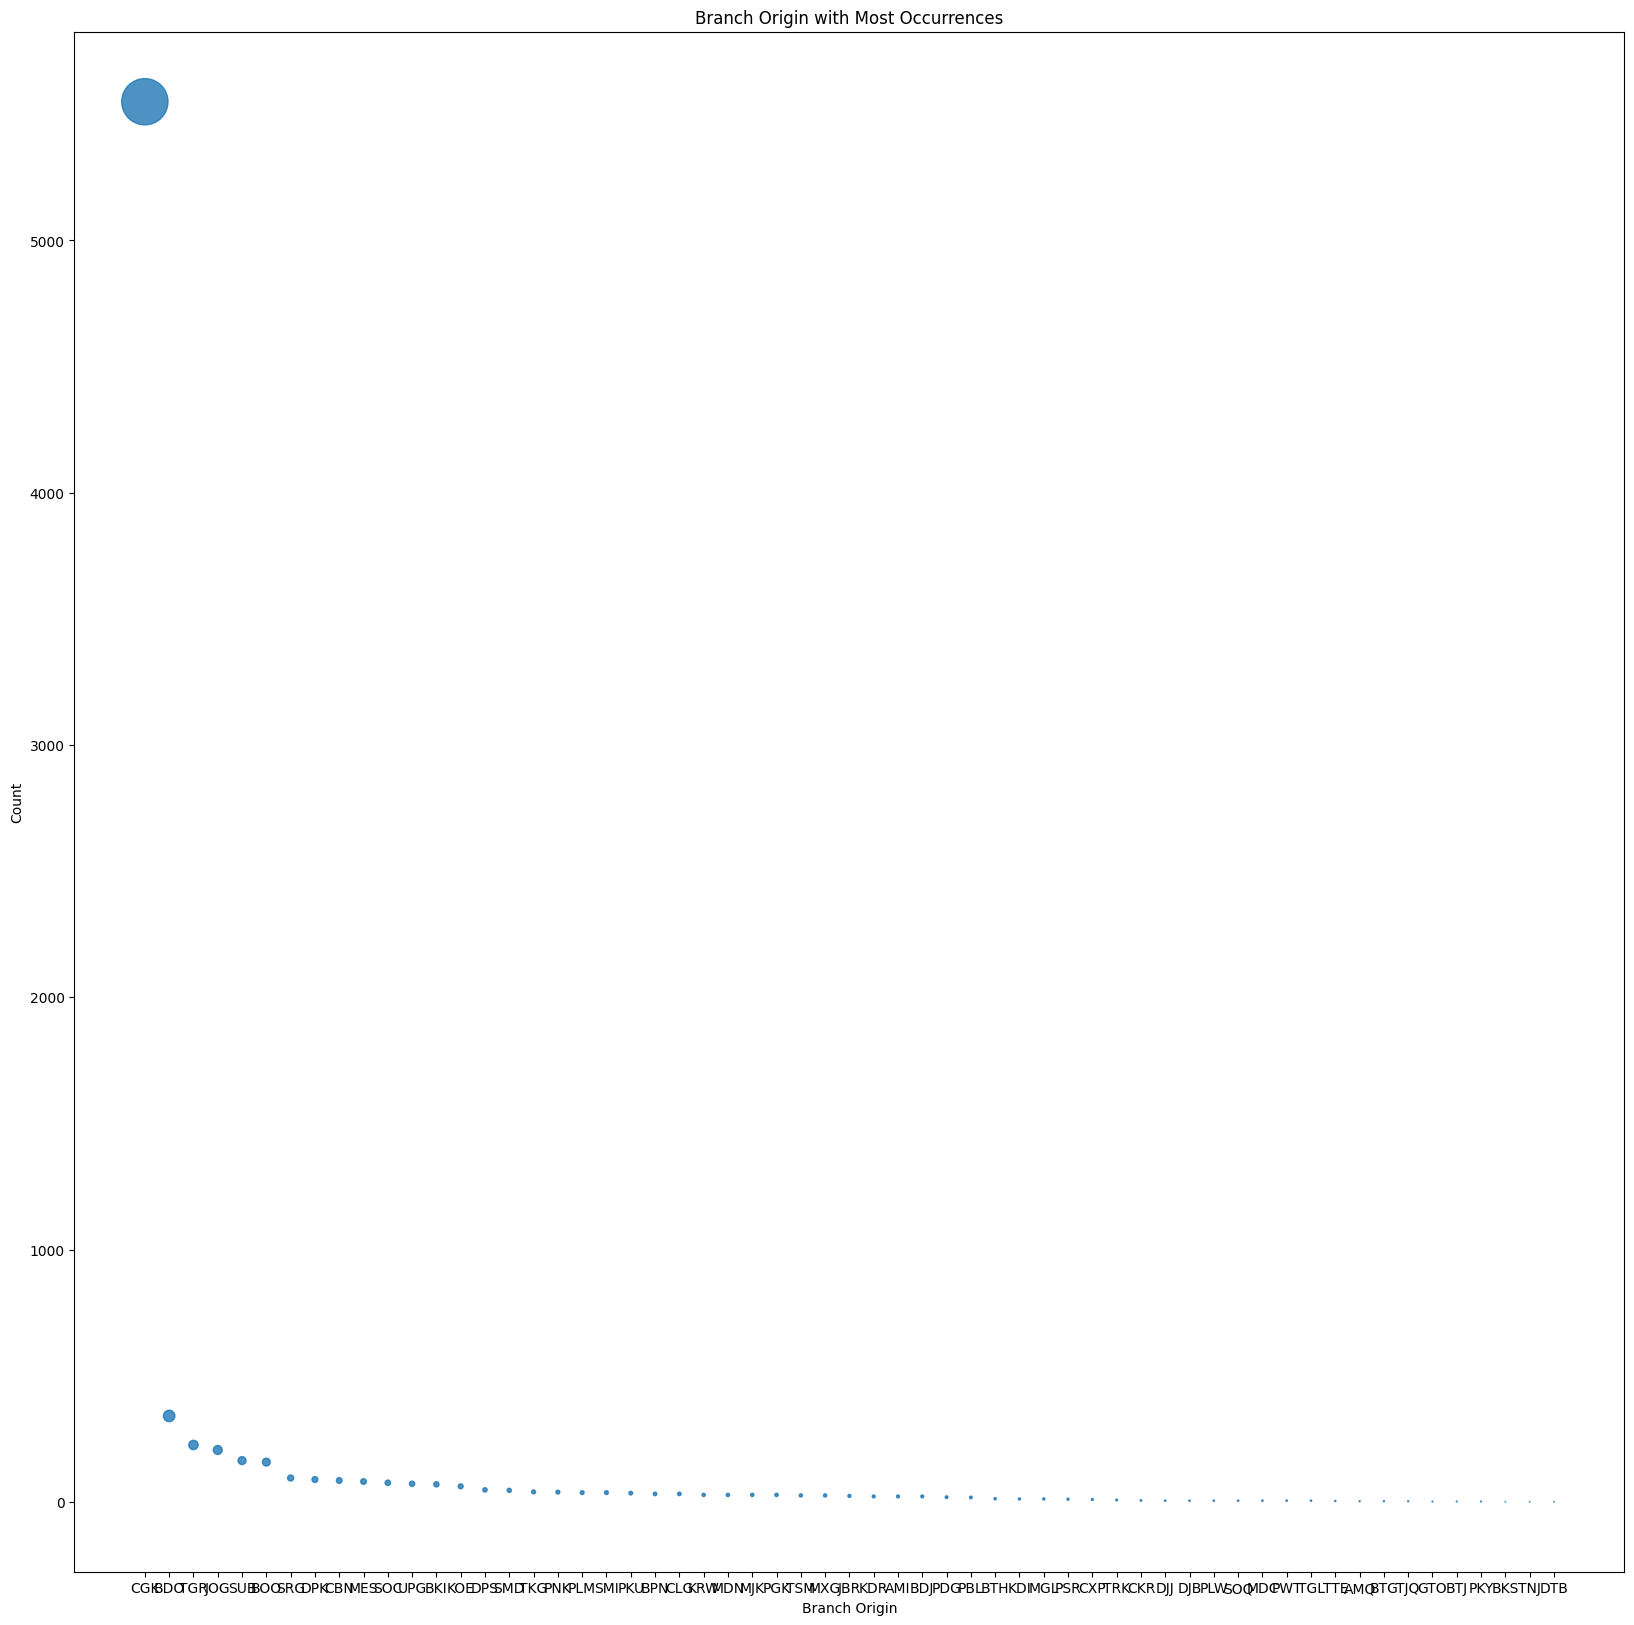

In [44]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(branch_df['branch_origin'], branch_df['count'], s=branch_df['size'], alpha=0.8)

ax.set_xlabel('Branch Origin')
ax.set_ylabel('Count')
ax.set_title('Branch Origin with Most Occurrences')
plt.savefig('bubble_chart.png')
plt.show()


pada buble cgk dan bdo ditunjukan ukurannya/banyaknya terjadi kejadian dengan mengacu apa yang terjaid pada branch tersebut

# machine learning

In [50]:
# forecasting kapan pesanan akan selesai/waktu pengiriman

In [51]:
df_clean

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,longitude,latitude,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus,task_done
0,2022-11-01 13:17:26,pacifiedLion0,2022-11-01 13:46:30,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000,True,SRG,Success,"BATANG ,KAB BATANG",yang bersangkutan,D01,13,CGK,COLF01,29.066667
1,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 05:33:48,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500,True,MGL,Success,"PURWODADI,PURWOREJO",yang bersangkutan,D01,1.3,CGK,COLF01,232.683333
2,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 06:41:57,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500,True,MGL,Success,"PURWODADI,PURWOREJO",yang bersangkutan,D01,3,CGK,COLF01,300.833333
3,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 11:18:19,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815,True,MGL,Success,"PURWODADI,PURWOREJO",yang bersangkutan,D01,0.625,CGK,COLF01,577.200000
4,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 03:51:49,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562,True,MGL,Success,"BAGELEN,PURWOREJO",yang bersangkutan,D01,3,CGK,COLF01,130.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 02:07:12,debonairPonie1,2022-11-10 02:38:04,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,<NA>,None,CGK,Success,"PALMERAH ,JAKARTA BA",atasan/staff/karyawan/bawahan,D10,1,CGK,COLF01,30.866667
8330,2022-11-10 02:21:42,murkyThrushe3,2022-11-10 02:37:52,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,<NA>,None,JOG,Failed,KOTA BANTUL,alamat tidak lengkap service/ tidak dikenal,U01,1,TGR,COLF02,16.166667
8331,2022-11-10 02:36:44,enragedCake7,2022-11-10 02:37:55,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,<NA>,None,TKG,Success,MARGA SEKAMPUNG KAB.,yang bersangkutan,D01,1.44,CGK,COLF01,1.183333
8332,2022-11-10 00:25:40,lyingPaella2,2022-11-10 02:37:53,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000,False,KOE,Failed,"KOMODO,LABUAN BAJO",penerima pindah alamat,U03,0.6,CGK,COLF02,132.216667


### memprediksi waktu pengiriman

In [52]:
df_clean_ml = df_clean.copy()
df_clean_ml= df_clean_ml.fillna(method='ffill')
# # Mengubah kolom datetime menjadi fitur-fitur numerik
# df_clean_ml['month'] = df_clean_ml['taskCompletedTime'].dt.month
# df_clean_ml['day'] = df_clean_ml['taskCompletedTime'].dt.day
# df_clean_ml['hour'] = df_clean_ml['taskCompletedTime'].dt.hour
# df_clean_ml['minute'] = df_clean_ml['taskCompletedTime'].dt.minute

In [53]:
df_clean_ml

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,longitude,latitude,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus,task_done
0,2022-11-01 13:17:26,pacifiedLion0,2022-11-01 13:46:30,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000,True,SRG,Success,"BATANG ,KAB BATANG",yang bersangkutan,D01,13,CGK,COLF01,29.066667
1,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 05:33:48,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500,True,MGL,Success,"PURWODADI,PURWOREJO",yang bersangkutan,D01,1.3,CGK,COLF01,232.683333
2,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 06:41:57,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500,True,MGL,Success,"PURWODADI,PURWOREJO",yang bersangkutan,D01,3,CGK,COLF01,300.833333
3,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 11:18:19,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815,True,MGL,Success,"PURWODADI,PURWOREJO",yang bersangkutan,D01,0.625,CGK,COLF01,577.200000
4,2022-11-01 01:41:07,peacefulTacos6,2022-11-01 03:51:49,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562,True,MGL,Success,"BAGELEN,PURWOREJO",yang bersangkutan,D01,3,CGK,COLF01,130.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 02:07:12,debonairPonie1,2022-11-10 02:38:04,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,80499,False,CGK,Success,"PALMERAH ,JAKARTA BA",atasan/staff/karyawan/bawahan,D10,1,CGK,COLF01,30.866667
8330,2022-11-10 02:21:42,murkyThrushe3,2022-11-10 02:37:52,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,80499,False,JOG,Failed,KOTA BANTUL,alamat tidak lengkap service/ tidak dikenal,U01,1,TGR,COLF02,16.166667
8331,2022-11-10 02:36:44,enragedCake7,2022-11-10 02:37:55,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,80499,False,TKG,Success,MARGA SEKAMPUNG KAB.,yang bersangkutan,D01,1.44,CGK,COLF01,1.183333
8332,2022-11-10 00:25:40,lyingPaella2,2022-11-10 02:37:53,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000,False,KOE,Failed,"KOMODO,LABUAN BAJO",penerima pindah alamat,U03,0.6,CGK,COLF02,132.216667


In [54]:
# # Konversi kolom 'taskCompletedTime' menjadi nilai numerik
# df_clean_ml['taskCompletedTime'] = df_clean_ml['taskCompletedTime'].apply(lambda x: datetime.timestamp(x))

# Memisahkan variabel independen (X) dan dependen (y)
X = df_clean_ml[['weight', 'amount']]
y = df_clean_ml['task_done']


# Memisahkan data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat model regresi linier dan melatihnya dengan data pelatihan
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Memprediksi waktu sampai dengan data pengujian
y_pred = regressor.predict(X_test)

In [55]:


# Konversi nilai prediksi menjadi format waktu yang sesuai
y_pred_time = df['taskCompletedTime'].iloc[X_test.index] + pd.to_timedelta(y_pred, unit='s')

# Menampilkan waktu prediksi
print(y_pred_time)

3353   2022-11-04 06:53:57.133454628
888    2022-11-02 01:11:20.525881648
7576   2022-11-10 02:38:38.163202636
454    2022-11-01 05:01:01.555483359
1172   2022-11-02 00:42:10.342125981
                    ...             
3936   2022-11-05 00:45:12.408747669
1940   2022-11-03 01:07:53.069565524
2067   2022-11-03 01:13:26.900604800
5879   2022-11-08 00:35:24.076446837
5765   2022-11-08 00:13:14.743479150
Length: 1667, dtype: datetime64[ns]


In [56]:
# Buat dataframe baru untuk menyimpan hasil prediksi
df_pred = pd.DataFrame({'taskCompletedTime_pred': y_pred_time}, index=X_test.index)

# Gabungkan dataframe baru dengan df_clean
df_clean_pred = pd.concat([df_clean_ml, df_pred], axis=1)

# Atur ulang index
df_clean_pred = df_clean_pred.reset_index(drop=True)
df_clean_pred.dropna(subset=['taskCompletedTime_pred'])

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,longitude,latitude,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus,task_done,taskCompletedTime_pred
14,2022-11-01 02:13:16,giddyCockatoo1,2022-11-01 08:39:01,done,Delivery,0c5c5f1f397a06f7a0ac,109.780323,-7.663731,34500,True,MGL,Success,"BUTUH,PURWOREJO",yang bersangkutan,D01,0.5,CGK,COLF01,385.750000,2022-11-01 08:40:14.196922529
20,2022-11-01 03:32:21,pacifiedLion0,2022-11-01 09:00:35,done,Delivery,fca6474de67a22064900,109.722736,-6.906620,63921,True,SRG,Success,"BATANG ,KAB BATANG",yang bersangkutan,D01,0.5,CGK,COLF01,328.233333,2022-11-01 09:01:47.488314546
23,2022-11-01 03:32:20,pacifiedLion0,2022-11-01 05:57:40,done,Delivery,ef46d77de6e18062a7ee,109.743047,-6.918373,52605,True,SRG,Success,"BATANG ,KAB BATANG",yang bersangkutan,D01,0.2,CGK,COLF01,145.333333,2022-11-01 05:58:52.933111501
29,2022-11-01 03:56:05,cautiousCoconut1,2022-11-01 07:13:11,done,Delivery,917e65ca46bda71c99a0,100.543671,-0.107262,164500,True,PDG,Success,"GUGUK,SARILAMAK",yang bersangkutan,D01,1,JOG,COLF01,197.100000,2022-11-01 07:14:20.778775289
31,2022-11-01 03:56:06,cautiousCoconut1,2022-11-01 07:54:32,done,Delivery,f79b959bc0150511ca27,100.524486,-0.120356,210000,True,PDG,Success,"GUGUK,SARILAMAK",yang bersangkutan,D01,0.25,CGK,COLF01,238.433333,2022-11-01 07:55:41.113527507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8302,2022-11-10 00:01:14,jealousChamois3,2022-11-10 02:38:35,done,Delivery,64ca8fc0c8729f9499bf,115.231769,-8.650435,155000,False,DPS,Success,"DENPASAR TIMUR,DENPA",atasan/staff/karyawan/bawahan,D10,1,DPS,COLF01,157.350000,2022-11-10 02:39:45.007583822
8304,2022-11-10 00:17:17,bubblyMagpie4,2022-11-10 02:38:34,done,Delivery,15174f8b2bf3da70a841,123.632750,-10.159239,158000,False,KOE,Success,SERI/SRI KUALA LOBAM,security,D04,1,KOE,COLF01,141.283333,2022-11-10 02:39:43.935328496
8316,2022-11-10 02:16:10,selfishMuesli9,2022-11-10 02:38:04,done,Delivery,f9446e212d993c560388,106.774885,-6.617988,80499,False,BOO,Success,"CIOMAS,KAB.BOGOR",yang bersangkutan,D01,16,BDO,COLF01,21.900000,2022-11-10 02:39:07.189455239
8324,2022-11-10 02:04:18,culturedPorpoise0,2022-11-10 02:38:01,done,Delivery,63be44e782c3003d2b80,0.000000,0.000000,80499,False,KDR,Success,KEDIRI,security,D04,1,MJK,COLF01,33.716667,2022-11-10 02:39:12.801948505


In [57]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 98.41460357801921


setelah diperhatikan lebih lanjut, model memikili kemungkinan overfitting yang tinggi maka kita memerlukan pengecekan dengan menggunakan regularization

In [58]:
# # Konversi kolom 'taskCompletedTime' menjadi nilai numerik
# df_clean_ml['taskCompletedTime'] = df_clean_ml['taskCompletedTime'].apply(lambda x: datetime.timestamp(x))

# Memisahkan variabel independen (X) dan dependen (y)
X = df_clean_ml[['weight', 'amount']]
y = df_clean_ml['task_done']

# Memisahkan data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# membuat model dengan menggunakan regularisasi
regressor = Lasso(alpha=0.5)
regressor.fit(X_train, y_train)

# predict with data
y_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 98.41700873131533


setelah dilakukan dengan penambahan rmse, model tidak menunjukan perubahan yang berarti hal ini, menunjukan bahwa model dapat digunakan pada saat kedepannya, atau jika data scientist selanjutnya memiliki data yang lebih lengkap lagi dapat dilakukan dengan menggunakan metode LSTM untuk mendapatkan waktu kapan barang akan tiba, atau jika tetap ingin menggunakan random forest maka tahapan selanjutnya selain menambah data adalah dengan menambah cross validation pada code diatas